# Data Exploration Assignment Part 1 - NOAA Ann Arbor Data

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Directly import the Ann Arbor rain data csv from the Google Drive data inventory
url = 'https://drive.google.com/file/d/17aWCaFWyqVfZ5IXGgNNVA2eS_YtcYoHU/view?usp=sharing'
url_download ='https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
data = pd.read_csv(url_download)
data

,STATION,Day,Hour,HourlyPrecipitation,Avg Dry Bulb Temp,Avg Wet Bulb Temp,Avg Relative Humidity
0,72537494889,2014-01-01,0,0.0,15.500000,14.000000,81.500000
1,72537494889,2014-01-01,1,0.0,16.000000,15.000000,80.000000
2,72537494889,2014-01-01,2,0.0,16.000000,15.000000,80.000000
3,72537494889,2014-01-01,3,0.0,16.000000,14.500000,79.500000
4,72537494889,2014-01-01,4,0.0,14.666667,13.333333,78.333333
...,...,...,...,...,...,...,...
69987,72537494889,2021-12-31,19,0.0,41.000000,39.000000,86.000000
69988,72537494889,2021-12-31,20,0.0,41.000000,39.000000,86.000000
69989,72537494889,2021-12-31,21,0.0,41.000000,39.000000,86.000000
69990,72537494889,2021-12-31,22,0.0,42.000000,40.000000,85.000000


## 1. Explore the distributions of Hourly Precipitation and Average Dry Bulb Temperature. Describe the mean, standard deviation, and distribution (with either a histogram or density plot). Describe what you find.



In [3]:
# Look over the general distributions to see what information we are expecting
data[['HourlyPrecipitation', 'Avg Dry Bulb Temp']].describe()

,HourlyPrecipitation,Avg Dry Bulb Temp
count,68695.000000,69367.000000
mean,0.003259,48.852083
std,0.025302,20.340282
min,0.000000,-26.000000
25%,0.000000,33.000000
50%,0.000000,49.000000
75%,0.000000,66.000000
max,1.350000,95.000000


To view the distributions of the data, we will plot the data on histograms.

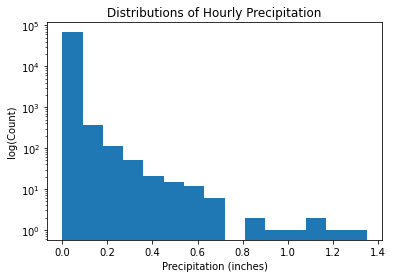

In [4]:
# Plot the hourly precipitation distrubutions on a histogram
precipitation = data['HourlyPrecipitation']

# Log the histogram's scale to have a better view of the hourly precipitation's distributions
plt.hist(precipitation, bins = 15, log=True)

# Name axes and title to describe what the histogram represents
plt.title('Distributions of Hourly Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('log(Count)')

plt.show()

The histogram shows that a majority of the data has an hourly precipitation of 0 inches. The logged y-scale makes the distributions better to visualize. The logged count means that the precipitation occured a logged number of times. For example, the data has around 10^5 (100,000) records of it not raining. Overall, the mean and standard deviation are close to zero because of the strong peak at 0. This means that most of the data is zero or close to zero, hence a small standard deviation from the average. This means that there is little distribution in the data. There are a few outliers which extend the skew too. The right skew means that the mean (average) is greater than the median. 

mean 0.003259 

std 0.025302 

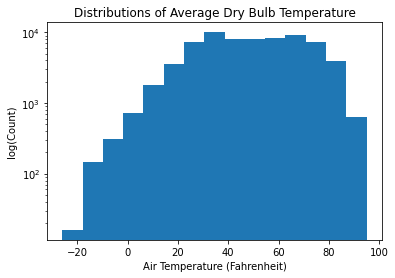

In [5]:
# Plot the average dry bulb temperature distributions on a histogram 
dry_temp = data['Avg Dry Bulb Temp']

# Log the histogram's scale to have a better view of the average dry bulb temperature's distributions
plt.hist(dry_temp, bins = 15, log=True)

# Name axes and title to describe what the histogram represents
plt.title('Distributions of Average Dry Bulb Temperature')
plt.xlabel('Air Temperature (Fahrenheit)')
plt.ylabel('log(Count)')

plt.show()

The histogram shows that a majority of the data is around 30-40 degrees Farenheit. The logged y-scale makes the distributions better to visualize. The logged count means that the temperature occured a logged number of times. For example, the data has around 10^4 (10,000) records where the temperature was around 30 degrees Farenheit. Overall, the mean is around 50 degrees Farenheit because the center of the curve lies at 50 on the x-axis. The standard deviation is going to be larger than the hourly precipitation. It will fall somewhere around 20 because the data does not rapidly decline on either side of the center's curve. This mean there is a larger distruibution of the data. There only seems to be a few outliers with extreme negative temperatures. The histogram has a minor right skew, but is only a little asymmentrical.

mean 48.852083

std 20.340282

Overall, I decided that a histogram would best show how the data is spread. For these histograms, each has the x-axis as the variable I am analyzing. This would be hourly precipitation in inches for the hourly precipitation data set and the air temperature in the average dry bulb temperature data set. The y-axes were both the amount of times that value appear in the data sets. I scaled both of the y-axes so the data was more visible. The values in the histogram are the temperatures and precipitation values in both data sets, therefore there are many rows of data accounted for. The data seems to fairly represent the weather in Ann Arbor with not too much rain and a more moderate climate and distinguishable seasons. 

## 2. Explore how Hourly Precipitation and Average Dry Bulb Temperature vary across the months of a year. Produce 2 figures summarizing these patterns. Describe what you find.


In [6]:
# View each day's hourly precipitation and average dry bulb temp
data[['Day', 'HourlyPrecipitation', 'Avg Dry Bulb Temp']].sort_values(by = 'Day', ascending = True)

,Day,HourlyPrecipitation,Avg Dry Bulb Temp
0,2014-01-01,0.00,15.500000
23,2014-01-01,0.01,14.833333
22,2014-01-01,0.00,14.000000
21,2014-01-01,0.00,14.000000
20,2014-01-01,0.00,14.000000
...,...,...,...
69969,2021-12-31,0.00,34.000000
69968,2021-12-31,0.00,34.000000
69990,2021-12-31,0.00,42.000000
69978,2021-12-31,0.00,39.000000


In [7]:
# Change Day column from object to datetime object
data['Day'] = pd.to_datetime(data['Day'])

# Create datetime Month and Year columns
data['Month'] = data['Day'].dt.month
data['Year'] = data['Day'].dt.year

In [8]:
# Group the data by month and hourly precipitation
# Find the mean of hourly precipitation for each month across all years
monthly_precip = data.groupby(['Month'])['HourlyPrecipitation'].mean()
monthly_precip

Month
1     0.001927
2     0.002295
3     0.003196
4     0.004244
5     0.004524
6     0.003602
7     0.003813
8     0.004246
9     0.003102
10    0.003506
11    0.002532
12    0.002114
Name: HourlyPrecipitation, dtype: float64

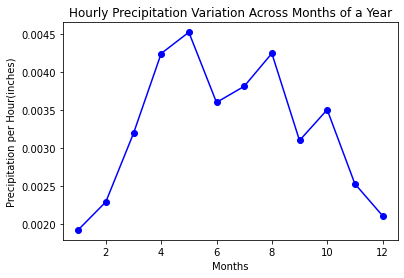

In [9]:
# Plot hourly precipitation averages for each month across all the years in the data set

# Retrieve the months
months = data['Month'].unique()

# Plot months as the x-axis, and the data line as the groupby product's averages
plt.plot(months, monthly_precip, label = 'HourlyPrecipitation', color = 'b', marker = 'o')

# Name the plot and add axes labels to describe the findings 
plt.title('Hourly Precipitation Variation Across Months of a Year')
plt.xlabel('Months')
plt.ylabel('Precipitation per Hour(inches)')

plt.show()

The line plot shows that the greatest hourly preipitation occurs during the spring time and is lowest during the winter months. This would infer that spring has the weather with the most rain, where it nearly never rains in the winter. There is another peak in the late summer months too. This would mean that it rains the most in spring and late summer. The precipitation per hour are relatively lower rates and the trend of the line plot is not consistently high. There are only a few spikes, and a gradual rise during the winter to spring transition. This means that Ann Arbor experiences rain, but not typically in extreme rates.

In [10]:
# # Group the data by month and dry bulb temperature
# Find the mean of dry bulb temperature for each month across all years
monthly_temp = data.groupby(['Month'])['Avg Dry Bulb Temp'].mean()

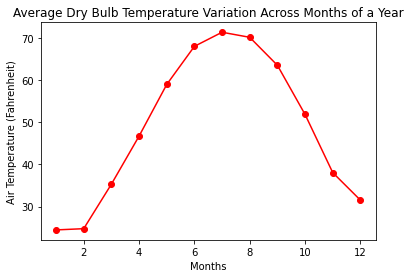

In [11]:
# Plot dry bulb temperature averages for each month across all the years in the data set

# Retrieve the months
months = data['Month'].unique()

# Plot months as the x-axis, and the data line as the groupby product's averages
plt.plot(months, monthly_temp, label = 'Average Dry Bulb Temp', color = 'r', marker = 'o')

# Name the plot and add axes labels to describe the findings 
plt.title('Average Dry Bulb Temperature Variation Across Months of a Year')
plt.xlabel('Months')
plt.ylabel('Air Temperature (Fahrenheit)')

plt.show()

The line plot shows a clear increase of air temperature up until the summer time when it is typically the most warm. Then after the summer, it decreases. This means that Ann Arbor's highest temperatures occur during the summer, typically in July or August. The coldest termperatures are in January and February. The termperatures tend to steadily increase and decrease before and after summer. Therefore, it is clear Ann Arbor has a climate that aligns with seasons. A majority of the year the temperatures are equivalent to a moderate climate where it is usually neither hot or cold.

Overall, I decided that line plots would best show how the data is spread over time. The lineplots each have the x-axis as months since I am trying to analyze the data across time. The y-axes are the variables from the data sets. This would be hourly precipitation in inches for the hourly precipitation data set and the air temperature in the average dry bulb temperature data set. The y-axis of the hourly precipitation are very small values, therefore it supports the claim that it doesn't rain too much in Ann Arbor. The most it rains is in the spring which follows the seasonality Ann Arbor experiences weather wise. The average dry bulb temperature is constantly increaseing and decreasing at a steady rate. This is reasonable because Ann Arbor experiences seasons and does not have abnormal spikes in cimate typically. The line plots for both data sets are accurate to their repsective data distributions from the histograms above. 

## 3. What is the most precipitation that the station registered across a 24-hour period and a 7-day (168-hour) period? When did these periods occur?
Note: Treat NaN rainfall values as 0.

In [12]:
# Fill the null hourly precipitation values as 0 
data['HourlyPrecipitation'].fillna(0.0)

# View data
data.head()

,STATION,Day,Hour,HourlyPrecipitation,Avg Dry Bulb Temp,Avg Wet Bulb Temp,Avg Relative Humidity,Month,Year
0,72537494889,2014-01-01,0,0.0,15.500000,14.000000,81.500000,1,2014
1,72537494889,2014-01-01,1,0.0,16.000000,15.000000,80.000000,1,2014
2,72537494889,2014-01-01,2,0.0,16.000000,15.000000,80.000000,1,2014
3,72537494889,2014-01-01,3,0.0,16.000000,14.500000,79.500000,1,2014
4,72537494889,2014-01-01,4,0.0,14.666667,13.333333,78.333333,1,2014


Find the maximum hourly precipitation and the day it occurred for a 24 hour period.

In [13]:
# Make a column for to sum the hourly precipitation over a 24 hour period
data['24_rolling'] = data['HourlyPrecipitation'].rolling(window = 24).sum()

# Fill null values in the 24 hour rolling to 0
data['24_rolling'] = data['24_rolling'].fillna(0.0)

In [14]:
# Find most precipitation for 24 hour period 
f"The most precipitation during a 24-hour period is {data['24_rolling'].max()} inches."

'The most precipitation during a 24-hour period is 3.3100000000000005 inches.'

In [15]:
# Find the day for the most amount of precipitation for 24 hour period 
max_24_date = data['24_rolling'].idxmax()
f"The most precipitation occured on {str(data.iloc[max_24_date]['Day'])}."

'The most precipitation occured on 2020-08-29 00:00:00.'

Find the maximum hourly precipitation and the day it occured for a 168 hour period.

In [16]:
# Make a column for to sum the hourly precipitation over a 168 hour period
data['168_rolling'] = data['HourlyPrecipitation'].rolling(168).sum()

# Fill null values in the 168 hour rolling to 0 
data['168_rolling'] = data['168_rolling'].fillna(0.0)

In [17]:
# Find most precipitation for 168 hour period 
f"The most precipitation during a 168-hour period is {data['168_rolling'].max()} inches."

'The most precipitation during a 168-hour period is 3.7199999999999998 inches.'

In [18]:
# Find the day for the most amount of precipitation for 168 hour period 
max_168_date = data['168_rolling'].idxmax()
f"The most precipitation occured on {str(data.iloc[max_168_date]['Day'])}."

'The most precipitation occured on 2020-09-01 00:00:00.'

To find the maximum amount of preipitation and their respective dates, I first created a rolling 24 hour and 186 hour column to record the total precipitation changes in those windows. The beginning and end of those columns had null values since the beginning and end windows had no prior or sequential data row to consider. Therefore, I filled those null values to zero since they experience essentially no changes in rain. For each column, I found the maximum precipitation and located the day by utilizing its row's index. Overall, the greatest amount of precipitation occured in the transition from summer to fall, August and September. These amounts of precipitation were around 3 inches for both window periods.

## 4. Over the most recent 5 years in the data, how many times has Ann Arbor surpassed the Atlas 14 5-year rainfall estimate for inches of rain in a 6-hour span?

Note: If the total rainfall surpasses the Atlas estimate twice in an overlapping
window, treat that as two separate events. For instance, on a given day, if the total
rain from 12am-6am surpassed the threshold and if the total rain from 1am-7am
surpassed the threshold, count those as two separate instances.

- The Atlas 14 5-year rainfall estimate for inches of rain in a 6-hour span = 2.22 inches. https://docs.google.com/spreadsheets/d/113kcoYRa28pyfYPzCbPfmya2wN-UxFvpdvCsqFpt33U/edit#gid=890601421

In [19]:
# View data
data.head()

,STATION,Day,Hour,HourlyPrecipitation,Avg Dry Bulb Temp,Avg Wet Bulb Temp,Avg Relative Humidity,Month,Year,24_rolling,168_rolling
0,72537494889,2014-01-01,0,0.0,15.500000,14.000000,81.500000,1,2014,0.0,0.0
1,72537494889,2014-01-01,1,0.0,16.000000,15.000000,80.000000,1,2014,0.0,0.0
2,72537494889,2014-01-01,2,0.0,16.000000,15.000000,80.000000,1,2014,0.0,0.0
3,72537494889,2014-01-01,3,0.0,16.000000,14.500000,79.500000,1,2014,0.0,0.0
4,72537494889,2014-01-01,4,0.0,14.666667,13.333333,78.333333,1,2014,0.0,0.0


In [20]:
# Retrieve the last 5 years from the data set
years = data['Year'].sort_values().unique()
past_5_years = years[-6:-1]

# Assign 2016 as the start of the five year span
start_year = past_5_years[0]

In [21]:
# Make a column for to sum the hourly precipitation over a 6 hour period
data['6_rolling'] = data['HourlyPrecipitation'].rolling(window = 6).sum()
data['6_rolling'] = data['6_rolling'].fillna(0.0)

# Filter for years 2016-2023 and a 6 hour period of rain greater than the Atlas 14 estimate
mask = (data['Year'] >= start_year) & (data['6_rolling'] > 2.22)
data[mask]

# Retrieve how many occurences surpassed the Atlas 14 estimate 6 hours
f"Over the most recent 5 years in the data, Ann Arbor surpassed the Atlas 14 \
5-year rainfall estimate for inches of rain in a 6-hour span {len(data[mask])} times."

'Over the most recent 5 years in the data, Ann Arbor surpassed the Atlas 14 5-year rainfall estimate for inches of rain in a 6-hour span 3 times.'

To see how many times Ann Arbor surpassed the Atlas 14 5-year rainfall estimate for a 6-hour span, I looked at the data for the Atlas 14 estimates. This value was 2.22 inches. Then, I retrieved the last 5 years from the data set, and created a new column for a 6 hour window using the rolling function. I calculated the sums for this column then filtered the data. The conditions I used to filter were the year and the 6 hour column. I made sure that the year was on or after 2016. This was 2016 since the most recent year in the data set was 2021. Then I filtered for the 6 hour column to be greater than 2.22 inches. After filtering, I found these conditions happened 3 times. 